Importando Librerias

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import functools as func

Primeros gráficos

Importamos los datos desde el archivo provisto por la catedra, para tener un primer pantallazo de los dátos con los cuales vamos a trabajar.

    Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
0        1        11.1            11.3           19.4
1        2        13.0            12.8           18.2
2        3        16.1            16.0           19.0
3        4        14.5            14.1           18.9
4        5        12.0            12.5           19.1
5        6        11.0            11.6           18.7
6        7        15.1            14.6          189.0
7        8        14.4            14.2           19.9
8        9        16.1            16.1           18.5
9       10        17.0            16.7           19.2
10      11        12.2            12.4           18.8
11      12        14.4            14.1           19.2


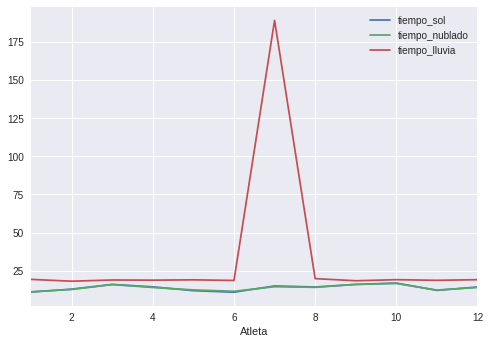

In [35]:
datos = pd.read_csv('./tiempos.txt', sep=' ')

def graficar(datos):
    datos.plot(x=datos['Atleta'], y=list(datos)[1:])
    sns.plt.show()

print(datos)
graficar(datos)

Eliminando los outliers

Lo primero que podemos observar es la precencia de un outlier, el cual distorisiona el gráfico, haciendolo inútil para un análisis rápido de los datos y contamina la muestra para los distintos experimentos que vamos a realizar. Por dicho motivo decidimos eliminar dicho outlier.

Para algunos experimentos necesitamos que las muestras tengan la misma cantidad de datos, por lo tanto no podemos eliminar solo la medición erronea del atleta numero 7 en los días de lluvia.
En un momento pensamos en arreglar el dato, pues viendo los mismos, podemos inferír que es un error de carga en el punto decimal del mismo. Tuvimos esta discusión en el grupo, ya que al ser una muestra de solo 12 atletas, quitar 1 atleta de los datos, implica la reducción en casi un 10%.
Al final, decidimos no hacerlo, pues en un escenario real no siempre se pueden realizar estas asunciones y el proceso de eliminación de outliers se realiza en función de la muestra obtenida.

Para la eliminación del outiler, el criterio utilizado, fue eliminar todos aquellos que esten a más de 3 desvíos estandares de la media de los datos de la muestra.

    Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
0        1        11.1            11.3           19.4
1        2        13.0            12.8           18.2
2        3        16.1            16.0           19.0
3        4        14.5            14.1           18.9
4        5        12.0            12.5           19.1
5        6        11.0            11.6           18.7
7        8        14.4            14.2           19.9
8        9        16.1            16.1           18.5
9       10        17.0            16.7           19.2
10      11        12.2            12.4           18.8
11      12        14.4            14.1           19.2


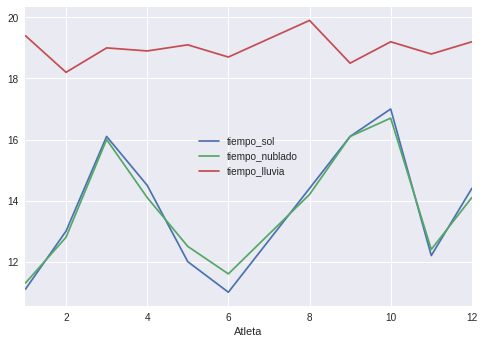

In [36]:
datosLimpios = datos[np.abs(datos - datos.mean())<=(3*datos.std())].dropna(how='any')
print(datosLimpios)
graficar(datosLimpios)

Luego de limpiar los datos, un análisis rápido de los mismos en base al gráfico, es que tanto los días de sol como los nublados, los tiempos de los corredores son parecidos. En cuanto a los días de lluvia, para todos los corredores sus tiempos disminuyen considerablemente.

Comprobando hipótesis t-test

Para la realización de los t-test, es necesario la verificacion de 3 hipótesis.

- Muestras independientes
- Distribuciones Normales
- Igual Varianza de los datos

Distribución Normal

In [37]:
def normal_dist(data):
    t,p_value = sp.stats.shapiro(data)
    return p_value > 0.05
#map(lambda x: normal_dist(datos[x]),list(datos)[1:])
datos_normales = func.reduce(lambda acc, x: acc and normal_dist(datosLimpios[x]),list(datosLimpios)[1:], True)

print(datos_normales)

True


Igual Varianza

In [38]:
def equal_variance(data):
    t, p_value = sp.stats.levene(data['tiempo_sol'], data['tiempo_nublado'], data['tiempo_lluvia'])
    print(p_value)
    return p_value > 0.05

igual_varianza = equal_variance(datosLimpios)

print(igual_varianza)

0.00406149463441
False


Conclusión 2

In [55]:
sp.stats.ttest_rel(datosLimpios['tiempo_sol'], datosLimpios['tiempo_nublado'])

Ttest_relResult(statistic=1.600386423731163e-15, pvalue=0.99999999999999878)

El p-value es muy grande, casi 1, por lo que no solo no podemos rechazar que no vengan de muestras con igual media, sino que "es muuuuy probable" que provengan de muestras con igual media. Por lo tanto, en los días nublados, en comparación con los soleados, no hay influencia del clima por sobre los tiempos de los atletas

In [58]:
sp.stats.ttest_rel(datosLimpios['tiempo_sol'], datosLimpios['tiempo_lluvia'])

Ttest_relResult(statistic=-8.1659802299869533, pvalue=9.832130127750511e-06)

Fianlmente podemos ver que la velocidad en días de lluvia es independiente del atleta, ya que si lo fuera, podríamos observar una correlación de las velocidades con respecto a los días soleados, y esto on pasa.

In [60]:
print(sp.stats.pearsonr(datosLimpios['tiempo_sol'], datosLimpios['tiempo_nublado']))

print(sp.stats.pearsonr(datosLimpios['tiempo_sol'], datosLimpios['tiempo_lluvia']))

(0.99224199979513195, 1.8469595486418115e-09)
(0.064963553876733887, 0.84949358072453474)


In [61]:
print(sp.stats.f_oneway(datosLimpios['tiempo_sol'], datosLimpios['tiempo_nublado'], datosLimpios['tiempo_lluvia']))

F_onewayResult(statistic=36.907516413855539, pvalue=8.1830487111034126e-09)


5.190909090909088
[5.190909090909088]


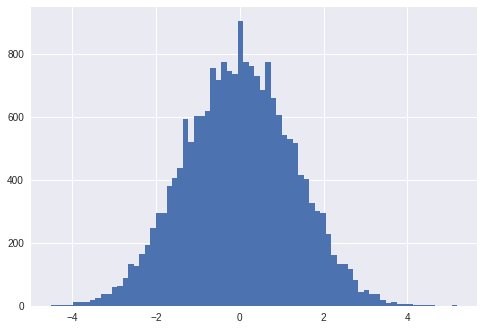

In [105]:
res = []


shuff =  datosLimpios['tiempo_sol'].append(datosLimpios['tiempo_lluvia'], ignore_index=True)

#print(datosLimpios['tiempo_sol'])
#print(datosLimpios['tiempo_lluvia'])
#print(shuff)

for i in range(20000):
    media1 = (shuff[:11]).mean()
    media2 = (shuff[11:]).mean()
    diferencia = media2 - media1
    res.append(diferencia)
    shuff = shuff.sample(frac=1)

print(res[0])

print([x for x in res if x >= res[0]])


sns.plt.hist(res, bins='auto')
sns.plt.show()